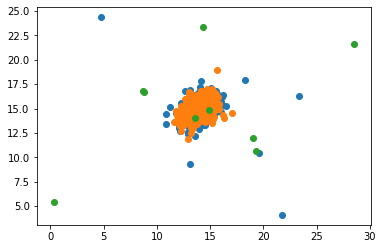

In [240]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import optimize

data1 = loadmat('ex8data1.mat')
X = data1['X']
Xval = data1['Xval']
yval = data1['yval']

plt.scatter(X[:,0], X[:,1])
plt.scatter(Xval[yval.flatten()==0,0], Xval[yval.flatten()==0,1])
plt.scatter(Xval[yval.flatten()==1,0], Xval[yval.flatten()==1,1])
plt.show()

In [159]:
mean1 = np.mean(X, axis=0)
var1 = np.std(X, axis=0)**2

In [160]:
def Pi(x, mean, var):
    return (1/np.sqrt(2*3.14*var))*np.exp((-(x-mean)**2)/(2*var))

In [161]:
def P(xV, meanV, varV):
    prod = np.ones((xV.shape[0], 1))
    for i in range(0, xV.shape[1]):
        prod *= Pi(xV[:,i].flatten(), meanV[i], varV[i]).reshape(xV.shape[0], 1)
    return prod

In [177]:
def F1(yval, ypred):
    yval = yval.flatten()
    ypred = ypred.flatten()
    #tp = np.sum(yval*ypred)
    #fp = np.sum((yval.all()==0)*ypred)
    #fn = np.sum((ypred.all()==0)*yval)
    prec = np.sum(yval[ypred==1])/np.sum(ypred)
    rec = np.sum(ypred[yval==1])/np.sum(yval)
    if prec==0 or rec==0:
        return 0
    return (2*prec*rec)/(prec+rec)

In [191]:
def chooseEpsilon(epsilon, Xval, yval, mean, var):
    mean = np.mean(Xval, axis=0)
    var = np.std(Xval, axis=0)**2
    f1_max = 0
    for i in range(0, 5000):
        ypred = P(Xval, mean, var)<epsilon
        f1 = F1(yval, ypred)
        
        if(f1>f1_max):
            eps = epsilon
            f1_max = f1
            
        epsilon *= 0.9
        
    return eps

In [192]:
print(chooseEpsilon(1, Xval, yval, mean1, var1))

C:\Users\Yuvraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


0.0004110983167056973


In [180]:
def anomalies(Xval, epsilon):
    mean = np.mean(Xval, axis=0)
    var = np.std(Xval, axis=0)**2
    ypred = P(Xval, mean, var)<epsilon
    return np.sum(ypred)

In [181]:
print("Predicted anomalies in CV set : %f" %anomalies(Xval, chooseEpsilon(1, Xval, yval, mean1, var1)))
print("Actual anomalies in CV set : %f" %np.sum(yval))
print("Predicted anomalies in training set : %f" %anomalies(X, chooseEpsilon(1, Xval, yval, mean1, var1)))

C:\Users\Yuvraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


Predicted anomalies in CV set : 7.000000
Actual anomalies in CV set : 9.000000
Predicted anomalies in training set : 6.000000


In [193]:
data2 = loadmat('ex8data2.mat')
X2 = data2['X']
Xval2 = data2['Xval']
yval2 = data2['yval']

In [194]:
mean2 = np.mean(X2, axis=0)
var2 = np.std(X2, axis=0)**2

In [195]:
print(chooseEpsilon(1, Xval2, yval2, mean2, var2))

C:\Users\Yuvraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


3.970306203073988e-20


In [196]:
print("Predicted anomalies in CV set : %f" %anomalies(Xval2, chooseEpsilon(1, Xval2, yval2, mean2, var2)))
print("Actual anomalies in CV set : %f" %np.sum(yval2))
print("Predicted anomalies in training set : %f" %anomalies(X2, 1.38e-18))

C:\Users\Yuvraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


Predicted anomalies in CV set : 6.000000
Actual anomalies in CV set : 10.000000
Predicted anomalies in training set : 117.000000


In [245]:
data3 = loadmat('ex8_movies')
Y = data3['Y']
R = data3['R']
data4 = loadmat('ex8_movieParams')

movies = data4['num_movies'][0,0]
users = data4['num_users'][0,0]
features = data4['num_features'][0,0]
X = data4['X']
theta = data4['Theta']
print(X.shape)
print(theta.shape)
print(R.shape)

(1682, 10)
(943, 10)
(1682, 943)


In [246]:
def costFunction(params, R, Y, reg):
    reshape = params.reshape(movies+users, features)
    theta = reshape[0:users,:]
    X = reshape[users:,:]
    unreg_cost = 0.5*np.sum((np.matmul(X, theta.T)*R - Y)**2)
    reg_cost = 0.5*reg*(np.sum(theta**2) + np.sum(X**2))
    return unreg_cost + reg_cost

In [247]:
print(costFunction(X, R, theta, Y, 0))

TypeError: costFunction() takes 4 positional arguments but 5 were given

In [248]:
def gradient(params, R, Y, reg):
    reshape = params.reshape(movies+users, features)
    theta = reshape[0:users,:]
    X = reshape[users:,:]
    grad_x = np.matmul((np.matmul(X, theta.T)*R - Y), theta) + reg*X
    grad_theta = np.matmul((np.matmul(X, theta.T)*R - Y).T, X) + reg*theta
    return np.append(grad_theta.flatten(), grad_x.flatten())

In [249]:
leng = (movies+users)*features
params = np.random.random(leng)
res = optimize.fmin_cg(costFunction, params, fprime=gradient, args=(R, Y, 0), maxiter=None)

KeyboardInterrupt: 